In [1]:
import cooler
from cooltools.eigdecomp import cis_eig

import numpy as np
import matplotlib.pyplot as plt

In [2]:
cool = cooler.Cooler("K562_hg19_chr3_50K.cool")
mat = cool.matrix(balance=True)[:]

In [3]:
signal_track_file = open("hg19_GC_chr3_50K.txt")
signal_track = []

for line in signal_track_file:
    sign = float(line)
    signal_track.append(sign)

signal_track = np.array(signal_track)

In [4]:
eigen_vec = cis_eig(mat, 1, signal_track)[1][0]

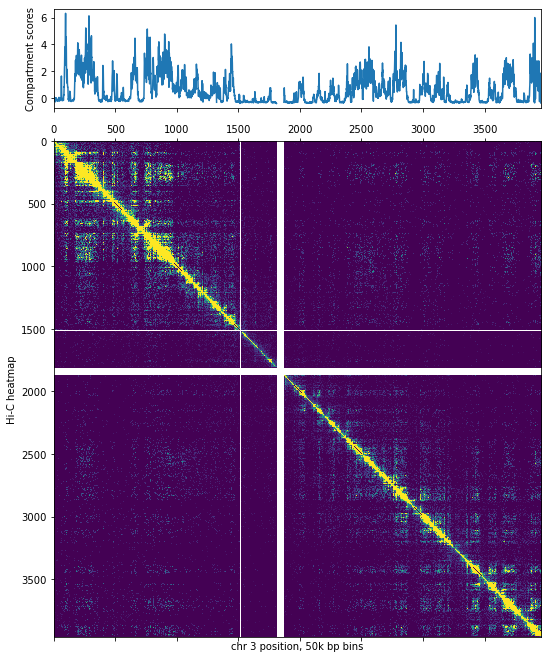

In [5]:
fig, ax = plt.subplots(nrows = 2,
                       figsize = (7.5, 9),
                       sharex = True,
                       gridspec_kw = {"height_ratios": [1,5], "width_ratios":[1]},
                       constrained_layout = True
                      )
ax[1].matshow(mat, vmax = 10, aspect = "auto")
ax[1].set_ylabel("Hi-C heatmap")
ax[1].set_xlabel("chr 3 position, 50k bp bins")

ax[0].plot(eigen_vec)
ax[0].set_ylabel("Compartment scores")

plt.show()

In [6]:
FPKM_file = open("K562_hg19_FPKM_chr3.bed")
FPKMs = []

for line in FPKM_file:
    fields = line.split()
    FPKM = float(fields[4])
    FPKM_log2 = np.log2(FPKM + 1)
    FPKMs.append(FPKM_log2)

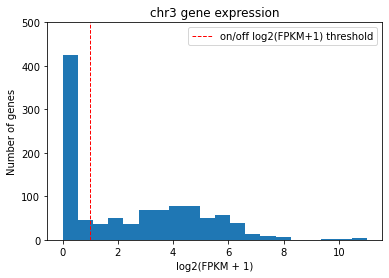

In [7]:
fig, ax = plt.subplots()
ax.hist(FPKMs, bins = 20)
ax.plot([1,1],[0,500], 
        color = "red", 
        linewidth = 1, 
        linestyle = "--", 
        label = "on/off log2(FPKM+1) threshold"
       )
ax.set_title("chr3 gene expression")
ax.set_xlabel("log2(FPKM + 1)")
ax.set_ylabel("Number of genes")
ax.set_ylim(0,500)
ax.legend()

plt.show()

In [8]:
chr3_mapped_file = open("K562_hg19_FPKM_compartment_chr3_mapnorm.bed")

A_on = []
A_off = []
B_on = []
B_off = []

for line in chr3_mapped_file:
    fields = line.split()
    FPKM = float(fields[4])
    FPKM_log2 = np.log2(FPKM + 1)
    H3K27me3 = float(fields[6])
    compartment = fields[7]
    
    if compartment == "A":
        if FPKM_log2>1.0:
            A_on.append(H3K27me3)
        else:
            A_off.append(H3K27me3)
    elif compartment == "B":
        if FPKM_log2>1.0:
            B_on.append(H3K27me3)
        else:
            B_off.append(H3K27me3)

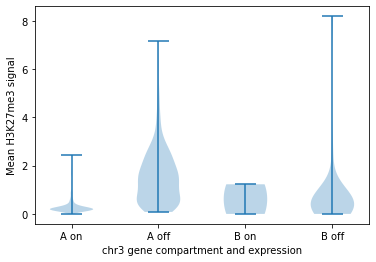

In [9]:
fig, ax = plt.subplots()
ax.violinplot([A_on, A_off, B_on, B_off], 
              positions = [1, 2, 3, 4]
             )

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["A on", "A off", "B on", "B off"])
ax.set_xlabel("chr3 gene compartment and expression")
ax.set_ylabel("Mean H3K27me3 signal")

plt.show()